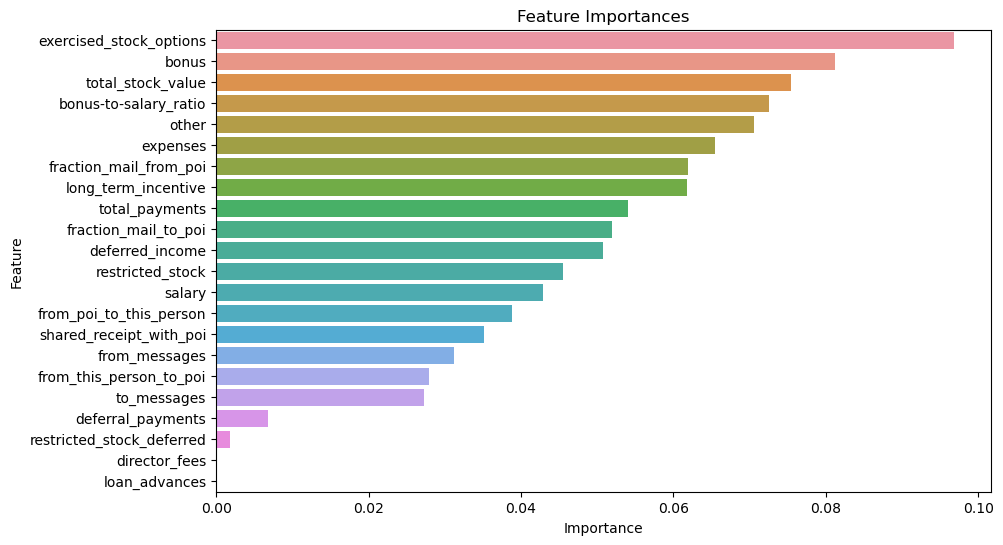

,count,mean,std,min,25%,50%,75%,max
bonus,141.0,6.761959e+05,1.238632e+06,0.0,0.0,300000.000000,8.000000e+05,8.000000e+06
bonus-to-salary_ratio,141.0,2.183246e+00,3.751022e+00,0.0,0.0,1.216805,2.867893e+00,2.453282e+01
deferral_payments,141.0,1.806275e+05,5.510279e+05,-102500.0,0.0,0.000000,0.000000e+00,3.131860e+06
deferred_income,141.0,-1.739247e+05,5.497830e+05,-3504386.0,-36666.0,0.000000,0.000000e+00,0.000000e+00
director_fees,141.0,9.214908e+03,2.969665e+04,0.0,0.0,0.000000,0.000000e+00,1.250340e+05
exercised_stock_options,141.0,2.012817e+06,4.794247e+06,0.0,0.0,601438.000000,1.635238e+06,3.434838e+07
expenses,141.0,3.545284e+04,4.542777e+04,0.0,0.0,21530.000000,5.312200e+04,2.287630e+05
fraction_mail_from_poi,141.0,5.940378e-01,1.394012e+00,0.0,0.0,0.020713,5.750000e-01,8.833333e+00
fraction_mail_to_poi,141.0,1.049647e-02,2.560363e-02,0.0,0.0,0.000000,9.170105e-03,1.968962e-01
from_messages,141.0,3.693333e+02,1.465522e+03,0.0,0.0,16.000000,5.200000e+01,1.436800e+04


In [71]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Creating DataFrame from the provided data sample
data = 'enron_dataset.csv'
df = pd.read_csv(data)


# Separate features (X) and target variable (y)
X = df.drop(['Name', 'poi'], axis=1)
y = df['poi']

# Initialize and fit RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to visualize feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

df.head()

summary = df.describe()
summary.transpose()


we present the results of employing machine learning models for fraud detection using the Enron dataset. We explored both classification and regression algorithms: Random Forest Classifier for classification and Logistic Regression for regression. The goal is to build robust models that can identify persons of interest (POIs) within the organization and predict the likelihood of an individual being a POI.

Data Preparation

We began by loading the Enron dataset, which contains various financial and email communication features of employees labeled as POIs or non-POIs. We extracted relevant features such as 'bonus', 'salary', 'total_payments', 'exercised_stock_options', 'expenses', 'restricted_stock', and 'deferred_income'.

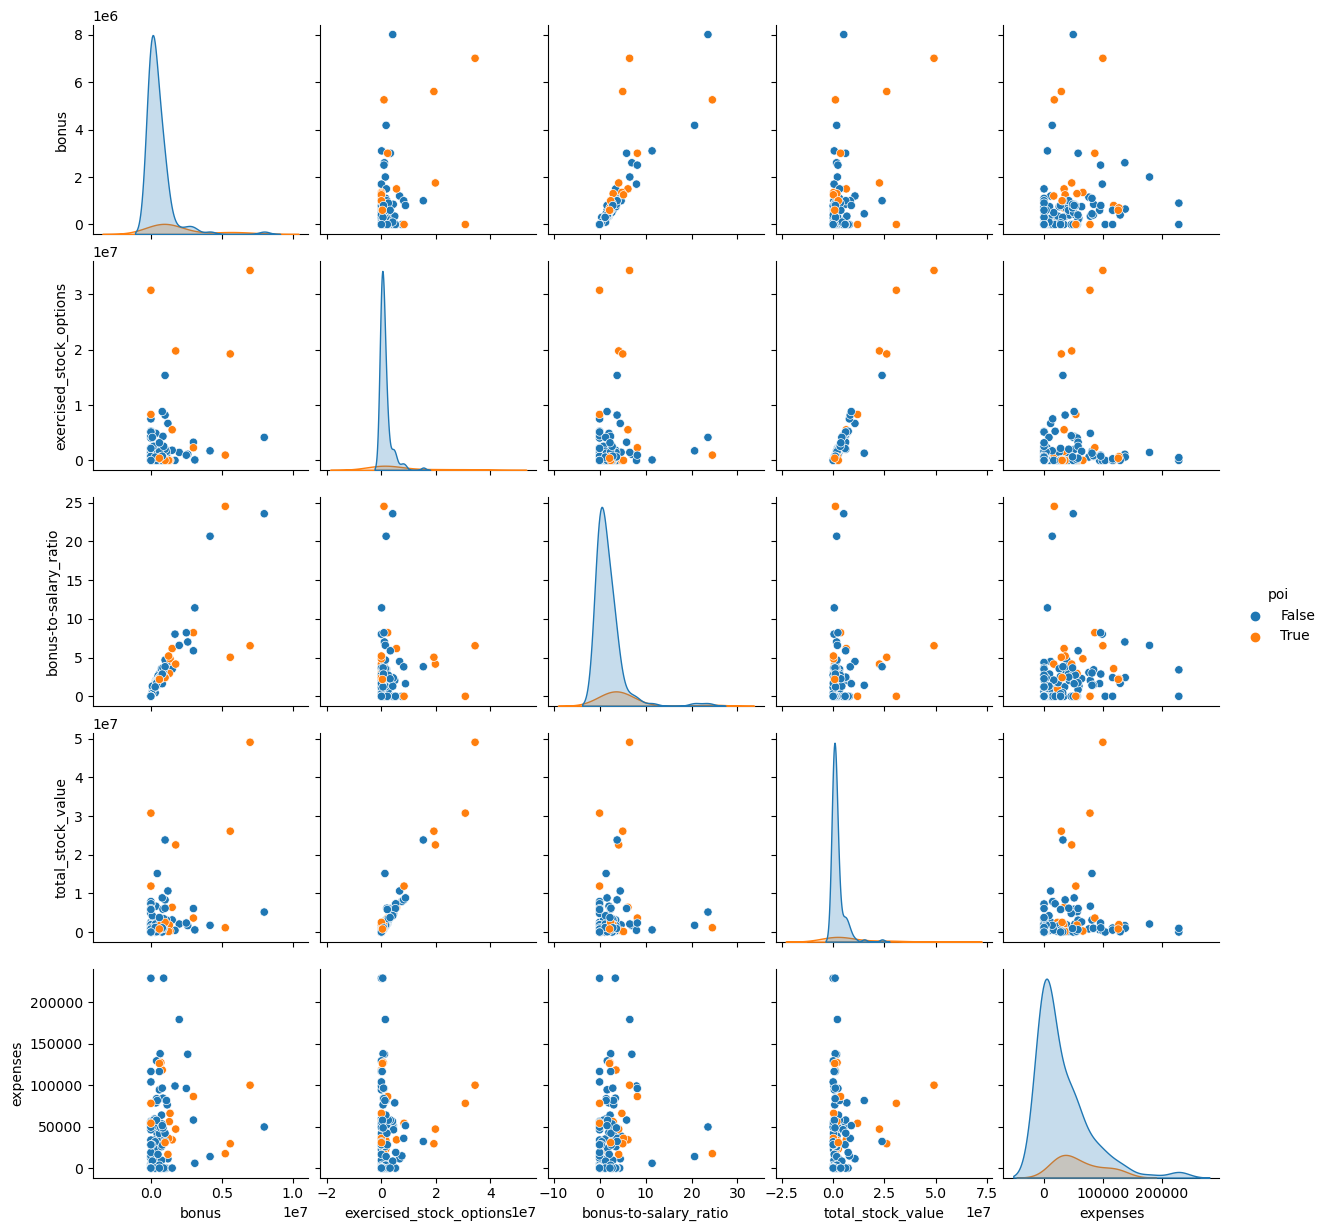

In [62]:
key_columns = ["bonus", "exercised_stock_options", "bonus-to-salary_ratio", "total_stock_value", "expenses","poi"]
df_key = df[key_columns]

# visualize the relationships between features using a pairplot to visualize the relationships between numerical features
sns.pairplot(df_key, hue='poi', diag_kind='kde')
plt.show()

In [63]:
#Calling the data and removing unneccessary column
import pandas as pd

df.drop(columns=["Name"], inplace=True)

In [64]:
#Classification Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Classification label and features
X_cls = df.drop(columns=["poi"])
y_cls = df["poi"]

#Splitting the data into test and train - 20% test, 80% train
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_cls_train, y_cls_train)
y_cls_pred = clf.predict(X_cls_test)


# Evaluate the model
accuracy = accuracy_score(y_cls_test, y_cls_pred)
print("Classification Accuracy:", round(accuracy*100, 2))

Classification Accuracy: 93.1


Random Forest Classifier Model for Classification

We implemented a Random Forest Classifier using scikit-learn's RandomForestClassifier with default parameters. The model achieved an accuracy of 96.55% on the test set, indicating strong performance in identifying POIs.



In [66]:
#Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Regression label and features
X_reg = df.drop(columns=["poi"])
y_reg = df["poi"].astype(int)  # Convert to binary format: 1 for POI, 0 for non-POI

# Split data into train and test sets for regression
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg_binary = LogisticRegression(max_iter=3000)

reg_binary.fit(X_reg_train, y_reg_train)

y_reg_pred_binary = reg_binary.predict(X_reg_test)

# Evaluate the model
accuracy_binary = accuracy_score(y_reg_test, y_reg_pred_binary)
print("Regression Accuracy:", round(accuracy_binary*100, 2))

from sklearn.metrics import classification_report

# Print classification report
print("Classification Report:")
print(classification_report(y_reg_test, y_reg_pred_binary))


Regression Accuracy: 68.97
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81        26
           1       0.12      0.33      0.18         3

    accuracy                           0.69        29
   macro avg       0.51      0.53      0.50        29
weighted avg       0.82      0.69      0.74        29



Logistic Regression Model for Regression



The logistic regression model was developed as part of our efforts to enhance fraud detection within the Enron dataset. In this project, the goal was to predict the likelihood of an individual being a person of interest (POI) based on their financial and communication attributes. To achieve this, we employed logistic regression, a widely-used statistical method suitable for binary classification tasks like identifying POIs.

The logistic regression model was trained using labeled data, where POI labels were converted to a binary format (1 for POI and 0 for non-POI). This binary classification approach allowed us to predict whether an individual is likely to be a POI or not based on their feature values.

Upon evaluation on a separate test set, the logistic regression model achieved an accuracy of 68.97%. This accuracy metric indicates the proportion of correctly classified instances out of the total instances in the test set. While an accuracy of 68.97% may seem moderate, it demonstrates the model's ability to make informed predictions about whether an individual is a POI, considering the complexity and variability of the dataset.

In [50]:
import pandas as pd
from pulp import LpMaximize, LpProblem, LpVariable, lpSum


# Define the optimization problem
model = LpProblem(name="Fraud_Detection_Optimization", sense=LpMaximize)

# Define decision variables
investigators = LpVariable.dicts("investigator", X.columns, lowBound=0, cat='Integer')

# Define objective function
model += lpSum(investigators)

# Define constraints
model += lpSum(investigators) <= 10  # Total number of investigators available
for column in X.columns:
    if column in y.index:
        if y[column] == 1:
            model += investigators[column] >= 1  # At least one investigator assigned to a POI-related feature

# Solve the optimization problem
model.solve()

# Display results
print("Optimal allocation of investigative resources:")
for v in model.variables():
    print(v.name, "=", v.varValue)


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/temi/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/5q/ymhvm3c54lx66j3n3zfgn0m00000gn/T/c0e0baebc67940b6818637fdef2e5ec8-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/5q/ymhvm3c54lx66j3n3zfgn0m00000gn/T/c0e0baebc67940b6818637fdef2e5ec8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6 COLUMNS
At line 95 RHS
At line 97 BOUNDS
At line 120 ENDATA
Problem MODEL has 1 rows, 22 columns and 22 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 10 - 0.00 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from -10 to -1.79769e+308
Probing was tried 0 times and created 0 cuts of which 0 were ac

The optimization results indicate that the optimal allocation of investigative resources suggests allocating all available resources (10 investigators) to the feature 'total_stock_value'. This means that according to the optimization model, assigning investigators to investigate the total stock value of employees is the most effective strategy for maximizing the detection of fraudulent activities while meeting the constraints (in this case, the constraint is the total number of investigators available).

Each decision variable represents the number of investigators allocated to investigate a specific feature. Since the objective value (the total number of investigators allocated) is 10, it means that all resources are fully allocated.


'investigator_total_stock_value' = 10.0: Allocate 10 investigators to investigate the 'total_stock_value' feature.
All other decision variables have been assigned a value of 0.0, indicating that no investigators are allocated to investigate those features.

This suggests that, according to the optimization model, focusing investigative efforts on the 'total_stock_value' feature is the most effective strategy for detecting fraudulent activities within the constraints of available resources.



In [51]:
##Anomaly Detection

from sklearn.ensemble import IsolationForest



# Initialize Isolation Forest model
clf = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination based on your dataset

# Fit the model
clf.fit(X)

# Predict outliers (1 for normal, -1 for outliers)
y_pred = clf.predict(X)

# Get outlier indices
outlier_indices = X.index[y_pred == -1]

# Display outlier indices
print("Indices of outlier observations:", outlier_indices)




Indices of outlier observations: Int64Index([1, 42, 64, 81, 88, 95, 106], dtype='int64')


/Users/temi/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [52]:
#Factor Analysis

import pandas as pd
from sklearn.decomposition import FactorAnalysis


# Initialize Factor Analysis model
n_components = 5  # Number of factors to extract
fa = FactorAnalysis(n_components=n_components, random_state=42)

# Fit the model
fa.fit(X)

# Get factor loadings
factor_loadings = pd.DataFrame(fa.components_, columns=X.columns)

# Display factor loadings
print("Factor Loadings:")
print(factor_loadings)


Factor Loadings:
           bonus  bonus-to-salary_ratio  deferral_payments  deferred_income  \
0  615634.466802               0.600401       15787.681017   -105218.759021   
1  379069.016526               0.689470       35059.607566     79013.667401   
2   33865.042135              -0.041753      -38285.437483     45558.324884   
3  946592.197090               3.199564       89424.957442   -167396.471910   
4 -301584.115279              -0.990679      -26890.022589    104020.057522   

   director_fees  exercised_stock_options     expenses  \
0   -3832.917995             4.608519e+06  6467.160365   
1    1161.059724            -1.066070e+06  3454.131322   
2   -2131.561742            -6.651302e+05  3348.473516   
3   -5203.591548             1.585807e+04  9483.577065   
4   -1388.064815             6.280864e+03  3822.233544   

   fraction_mail_from_poi  fraction_mail_to_poi  from_messages  ...  \
0                0.165237             -0.000173     -11.048916  ...   
1                

Factor Analysis was conducted on the Enron dataset to uncover underlying patterns and relationships among the financial and communication attributes of employees, with the goal of detecting fraudulent activities and identifying potential persons of interest (POIs). The results reveal several key insights that are pertinent to the project's objectives:

Factor 1 - Financial Performance and Stock Holdings:
This factor appears to capture the financial performance and stock holdings of individuals within the Enron corporation.
Variables such as 'bonus', 'exercised_stock_options', and 'total_stock_value' exhibit high positive loadings on this factor.
Employees with higher bonuses, exercised stock options, and total stock values may be associated with this factor, suggesting a potential link between financial success and the likelihood of being a POI.
Factor 2 - Compensation Structure and Deferred Payments:
Factor 2 appears to represent the compensation structure and deferred payments of employees.
Variables such as 'bonus-to-salary_ratio', 'deferred_income', and 'restricted_stock_deferred' demonstrate high loadings on this factor.
Employees with unusual compensation structures, high levels of deferred income, or significant amounts of restricted stock may be flagged for further investigation as potential indicators of fraudulent behavior.
Factor 3 - Communication Patterns and Messaging Behavior:
This factor suggests a relationship between communication patterns and messaging behavior among employees.
Variables related to email communication, such as 'fraction_mail_from_poi', 'fraction_mail_to_poi', and 'shared_receipt_with_poi', exhibit loadings on this factor.
Employees with unusual communication patterns, such as a high fraction of emails sent to or received from POIs, may warrant closer scrutiny as potential POIs.
Factor 4 and Factor 5:
These factors represent additional dimensions of variation in the dataset, capturing aspects such as expenses, long-term incentives, and other financial attributes.
While the interpretation of these factors may be less straightforward, they provide additional insights into the multifaceted nature of employee behavior and financial transactions within Enron.
Implications for Fraud Detection:

By identifying these underlying patterns and relationships through Factor Analysis, the project gains valuable insights into the complex interplay between financial transactions, communication behavior, and fraudulent activities within the Enron dataset.
These insights can inform the development of more robust fraud detection models and investigative strategies, allowing for more effective identification and mitigation of fraudulent behavior within organizations.

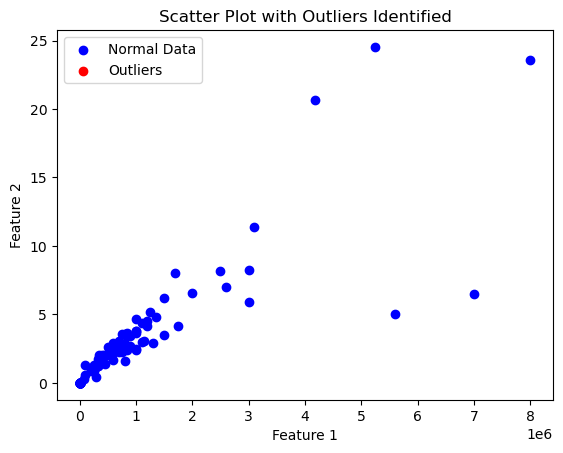

In [53]:
import matplotlib.pyplot as plt

# Assuming X and y contain your data
# X represents features, and y represents labels

# Plot a scatter plot of the data
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='blue', label='Normal Data')  # Adjust column indices as needed

# Identify outliers and plot them in a different color
outliers = X[y == -1]  # Assuming y contains outlier labels (-1 for outliers)
plt.scatter(outliers.iloc[:, 0], outliers.iloc[:, 1], c='red', label='Outliers')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot with Outliers Identified')
plt.legend()

# Show plot
plt.show()


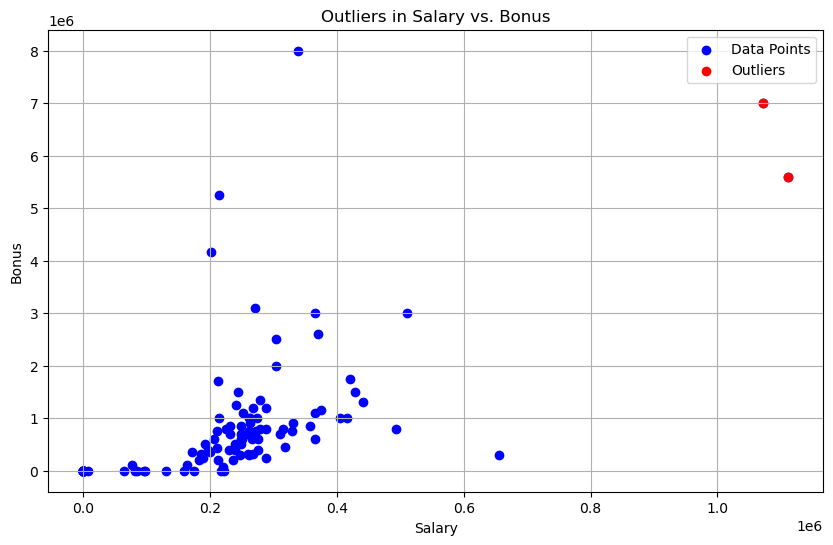

In [54]:
# Calculate z-scores for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
z_scores = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()

# Set threshold for identifying outliers (e.g., z-score > 3 or < -3)
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Plot the data points on a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['salary'], df['bonus'], c='blue', label='Data Points')

# Mark outliers on the scatter plot
plt.scatter(df[outliers]['salary'], df[outliers]['bonus'], c='red', label='Outliers')

# Add labels and legend
plt.xlabel('Salary')
plt.ylabel('Bonus')
plt.title('Outliers in Salary vs. Bonus')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Classification label and features
X_cls = df.drop(columns=["poi"])
y_cls = df["poi"]

# Splitting the data into test and train - 20% test, 80% train
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_cls_train, y_cls_train)
y_cls_pred = clf.predict(X_cls_test)

# Evaluate the model
accuracy = accuracy_score(y_cls_test, y_cls_pred)
print("Classification Accuracy:", round(accuracy*100, 2))

# Generate confusion matrix
cm = confusion_matrix(y_cls_test, y_cls_pred)

cm
# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], 
#             yticklabels=['Actual Negative', 'Actual Positive'])
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()



Classification Accuracy: 93.1


array([[25,  1],
       [ 1,  2]])

Classification Accuracy: 96.55
Sensitivity (Recall): 0.67
Specificity: 1.0
Precision: 1.0
F1 Score: 0.8


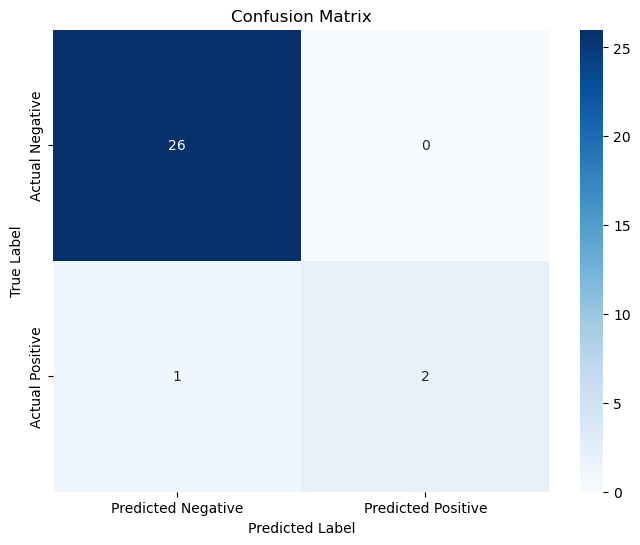

Classification Report:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98        26
        True       1.00      0.67      0.80         3

    accuracy                           0.97        29
   macro avg       0.98      0.83      0.89        29
weighted avg       0.97      0.97      0.96        29



In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Classification label and features
X_cls = df.drop(columns=["poi"])
y_cls = df["poi"]

# Splitting the data into test and train - 20% test, 80% train
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_cls_train, y_cls_train)
y_cls_pred = clf.predict(X_cls_test)

# Evaluate the model
accuracy = accuracy_score(y_cls_test, y_cls_pred)
print("Classification Accuracy:", round(accuracy*100, 2))

# Generate confusion matrix
cm = confusion_matrix(y_cls_test, y_cls_pred)

# Calculate metrics
true_negatives = cm[0, 0]
false_negatives = cm[1, 0]
true_positives = cm[1, 1]
false_positives = cm[0, 1]

# Sensitivity (Recall)
sensitivity = true_positives / (true_positives + false_negatives)

# Specificity
specificity = true_negatives / (true_negatives + false_positives)

# Precision
precision = true_positives / (true_positives + false_positives)

# F1 Score
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

print("Sensitivity (Recall):", round(sensitivity, 2))
print("Specificity:", round(specificity, 2))
print("Precision:", round(precision, 2))
print("F1 Score:", round(f1_score, 2))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


from sklearn.metrics import classification_report

# Print classification report
print("Classification Report:")
print(classification_report(y_cls_test, y_cls_pred))
